Train diabetes classification model

This notebook reads a CSV file and trains a model to predict diabetes in patients. The data is already preprocessed and requires no feature engineering.

The evaluation methods were used during experimentation to decide whether the model was accurate enough. Moving forward, there's a preference to use the autolog feature of MLflow to more easily deploy the model later on.

Read data from local file

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

print("Reading data...")
df = pd.read_csv('../data/Heart_Disease.csv')

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

df.head()

Reading data...


,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


Split data

In [2]:
print("Splitting data...")
X, y = df[['sex','age','education','smokingStatus', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 
    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].values, df['CHDRisk'].values

Splitting data...


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Train model

In [4]:
from sklearn.linear_model import LogisticRegression

print("Training model...")
model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, y_train)

Training model...


Evaluate model

Accuracy: 0.8458748866727108
AUC: 0.7392109394662096


Text(0.5, 1.0, 'ROC Curve')

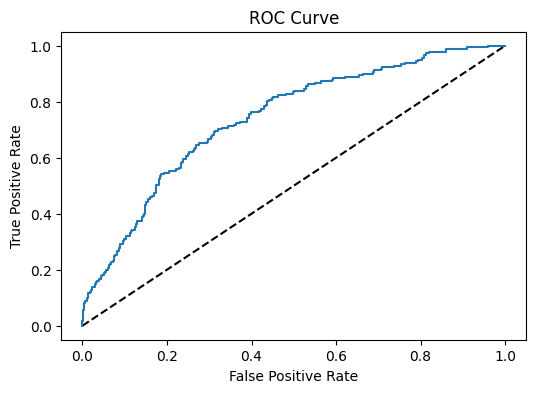

In [5]:

import numpy as np

y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)

print('Accuracy:', acc)


from sklearn.metrics import roc_auc_score

y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])

print('AUC: ' + str(auc))


from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [6]:
from sklearn.linear_model import LogisticRegression

for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=c, solver="liblinear").fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_scores)
    print(f"C={c} -> AUC={auc:.3f}")

C=0.001 -> AUC=0.637
C=0.01 -> AUC=0.663
C=0.1 -> AUC=0.699
C=1 -> AUC=0.735
C=10 -> AUC=0.739
C=100 -> AUC=0.739
